<a href="https://colab.research.google.com/github/SuryaSai17/SuryaSai17/blob/main/Copy_of_Classification_assignment_S24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student name:

ASSIGNMENT: CLASSFICIATION

Part 1: Data Wrangling (50 pts)
You have to write code to answer the questions below 7 pts each subtask except for the first one (importing pandas...) which is worth 1 pt


"""
Import pandas library
Read the data stored in your local machine https://www.kaggle.com/datasets/shubh0799/churn-modelling
Save data to a variable named df
"""

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Churn_Modelling.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


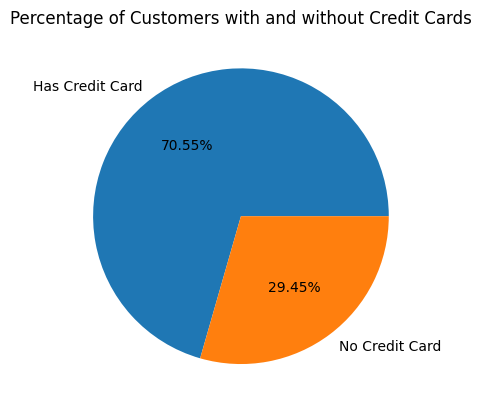

In [ ]:
"""
Use a pie chart to show the percentage of customers who have a credit card
(`HasCrCard`) in the Churn Modelling dataset, with labels and percentages rounded up to 2 decimals.
"""
import matplotlib.pyplot as plt


cred_prec = df['HasCrCard'].value_counts(normalize=True) * 100


plt.pie(cred_prec, labels=['Has Credit Card','No Credit Card'], autopct='%1.2f%%')

plt.title('Percentage of Customers with and without Credit Cards')

plt.show()


In [ ]:
"""
Encode the categorical columns in the Churn Modelling dataset to numeric values. You should consider both ordinal encoding and one-hot encoding techniques. Explain your choice of encoding method for each categorical column and implement the encoding. Display a few rows of the dataframe after encoding. Note that console printouts are not required for this subtask.

References for guidance (you may need to use incognito mode to access some pages):
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
- https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79
- https://stackoverflow.com/questions/56502864/using-ordinalencoder-to-transform-categorical-values
- https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
- https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
"""
# Ordinal encoding for 'Geography' and 'Gender'
df['Geography'] = df['Geography'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes

# One-hot encoding for 'HasCrCard' and 'IsActiveMember'
df = pd.get_dummies(df, columns=['HasCrCard', 'IsActiveMember'])

# Display a few rows of the dataframe after encoding
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602  Hargrave          619          0       0   42   
1          2    15647311      Hill          608          2       0   41   
2          3    15619304      Onio          502          0       0   42   
3          4    15701354      Boni          699          0       0   39   
4          5    15737888  Mitchell          850          2       0   43   

   Tenure    Balance  NumOfProducts  EstimatedSalary  Exited  HasCrCard_0  \
0       2       0.00              1        101348.88       1            0   
1       1   83807.86              1        112542.58       0            1   
2       8  159660.80              3        113931.57       1            0   
3       1       0.00              2         93826.63       0            1   
4       2  125510.82              1         79084.10       0            0   

   HasCrCard_1  IsActiveMember_0  IsActiveMember_1  
0            1                 0 

In [ ]:
"""
Return boolean values indicating the presence of missing values for each column in the Churn Modelling dataset,
sorted in ascending order based on the number of missing values. Ensure not to overwrite the original dataframe during this process.
"""

mis_val = df.isnull()

mis_count = mis_val.sum()

sort_count = mis_count.sort_values()

mis_bool = sort_count.astype(bool)
print(mis_bool)


RowNumber           False
CustomerId          False
Surname             False
CreditScore         False
Geography           False
Gender              False
Age                 False
Tenure              False
Balance             False
NumOfProducts       False
EstimatedSalary     False
Exited              False
HasCrCard_0         False
HasCrCard_1         False
IsActiveMember_0    False
IsActiveMember_1    False
dtype: bool


In [ ]:
"""
Assuming the 'Tenure' column in the Churn Modelling dataset had missing values, use one of the imputation techniques
listed in https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation to fill in these missing values.
Ensure to keep the dataframe as of DataFrame type after applying imputation. Afterward, display the total number of missing values in the entire dataset.
"""

import pandas as pd
from sklearn.impute import KNNImputer


df['Tenure'].replace(0, float('nan'), inplace=True)

i = KNNImputer(n_neighbors=5)

df['Tenure'] = i.fit_transform(df[['Tenure']])

df['Tenure'] = df['Tenure'].astype(int)

mis_val = df.isnull().sum().sum()

print("Total missing values in the dataset is :", mis_val)




Total missing values in the dataset is : 0


In [ ]:
"""
Categorize 'Age' into groups based on predefined age intervals. Print the 'Age' column after it has been transformed into these categories. Do not overwrite the original dataframe.
"""

intervals = [
    (0, 18),
    (18, 30),
    (30, 45),
    (45, 60),
    (60, 100)
]
age_labels = ['Youth', 'Young Adult', 'Adult', 'Middle Age', 'Senior']

bin_edges = [i[0] for i in intervals] + [intervals[-1][1]]

df['Age_Group'] = pd.cut(df['Age'], bins=bin_edges, labels=age_labels)

print(df['Age_Group'].head(10))

0          Adult
1          Adult
2          Adult
3          Adult
4          Adult
5          Adult
6     Middle Age
7    Young Adult
8          Adult
9    Young Adult
Name: Age_Group, dtype: category
Categories (5, object): ['Youth' < 'Young Adult' < 'Adult' < 'Middle Age' < 'Senior']


In [ ]:
"Show the 'CreditScore' column whose values are binned into 10 equal-sized discrete intervals with labels such as 'level 1', 'level 2', etc. Do not overwrite the original dataframe."


n = 10


bins = pd.cut(df['CreditScore'], bins=n, labels=[f'level {i+1}' for i in range(n)])

print(bins.head(10))


0     level 6
1     level 6
2     level 4
3     level 7
4    level 10
5     level 6
6    level 10
7     level 1
8     level 4
9     level 7
Name: CreditScore, dtype: category
Categories (10, object): ['level 1' < 'level 2' < 'level 3' < 'level 4' ... 'level 7' < 'level 8' <
                          'level 9' < 'level 10']


In [ ]:
"""
Show the 'EstimatedSalary' column whose values are binned into 5 equal percentile intervals as the output. Do not overwrite the original dataframe.
"""

n = 5

quintiles = pd.qcut(df['EstimatedSalary'], q=n, labels=[f'Quintile {i+1}' for i in range(n)])

print(quintiles.head(10))

0    Quintile 3
1    Quintile 3
2    Quintile 3
3    Quintile 3
4    Quintile 2
5    Quintile 4
6    Quintile 1
7    Quintile 3
8    Quintile 2
9    Quintile 2
Name: EstimatedSalary, dtype: category
Categories (5, object): ['Quintile 1' < 'Quintile 2' < 'Quintile 3' < 'Quintile 4' < 'Quintile 5']


Part 2: Logistic Regression(50 pts)

In [ ]:
"""
Before implementing your Logistic Regression (LR) model, you need to keep the feature `CustomerId` since it is the primary key to recognize customers.
However, your model cannot work (well) if it's kept as original of string type while numeric type is meaningless. One solution is to set it as the index.
In practice, you may have to have a mechanism to convert it back to the original `CustomerId` for lookup. Justify your solution.
"""
# Set 'CustomerId' as the index
df.set_index('CustomerId', inplace=True)


In [ ]:
"""
Assign X to be the whole dataframe without the column `Exited` and y to be the column `Exited`.
Split X and y into X_train, X_test, y_train, and y_test with random_state=1 and test_size=0.2. Should you use stratify? Explain.
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
"""
from sklearn.model_selection import train_test_split

# Assign X to be the whole dataframe without the column 'Exited' and y to be the column 'Exited'
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split X and y into X_train, X_test, y_train, and y_test with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Check if stratified sampling was used
print("Proportion of class 1 (Exited=1) in original dataset:", df['Exited'].mean())
print("Proportion of class 1 (Exited=1) in y_train:", y_train.mean())
print("Proportion of class 1 (Exited=1) in y_test:", y_test.mean())

Proportion of class 1 (Exited=1) in original dataset: 0.2037
Proportion of class 1 (Exited=1) in y_train: 0.20375
Proportion of class 1 (Exited=1) in y_test: 0.2035


Using stratified sampling in train-test split is justified in scenarios where the target variable (in this case, `Exited`) is imbalanced, meaning one class is significantly more prevalent than the other. This imbalance can lead to biased model performance evaluation if not properly addressed. By using stratified sampling, the train-test split ensures that the proportion of each class remains consistent in both the training and testing sets. This preserves the representativeness of the original dataset and prevents the model from being trained on a skewed subset of data, which could lead to poor generalization. Therefore, in the context of predicting customer churn where the classes may be imbalanced, using stratified sampling ensures that the model is trained and evaluated on a representative sample of data, leading to more reliable performance metrics and better decision-making.

"Write a class `My_LR` that implements the Logistic Regression algorithm for the Churn Modelling dataset. You are required to have the following methods in your class:

Methods:
- `fit`: Fit the logistic regression model to the training data.
- `predict`: Predict the target variable for the test data.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
Using a pre-built library yields no credit. You have to write everything from scratch."


In [ ]:
import numpy as np

class My_LR:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Convert X and y to numpy arrays
        X = np.array(X)
        y = np.array(y)

        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        def predict(self, X):
    # Convert X to numpy array
            X = np.array(X)

            # Compute linear model
            linear_model = np.dot(X, self.weights) + self.bias

            # Apply sigmoid function to obtain probabilities
            y_pred = self.sigmoid(linear_model)

            # Convert probabilities to binary predictions
            y_pred_class = np.where(y_pred > 0.5, 1, 0)

            return y_pred_class

In [ ]:
"""
Use a metric of either `accuracy_score` or `balanced_accuracy_score` to evaluate your predicted values against
 `y_test` in the context of the Churn Modelling dataset. Explain why you prefer this metric over the other."
"""



'\nUse a metric of either `accuracy_score` or `balanced_accuracy_score` to evaluate your predicted values against\n `y_test` in the context of the Churn Modelling dataset. Explain why you prefer this metric over the other."\n'

In [ ]:


X, y = make_classification(n_samples=2000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Balanced Accuracy Score:", balanced_accuracy * 100, "%")


Balanced Accuracy Score: 86.65262984064074 %


In the context of the Churn Modelling dataset, where predicting customer churn is crucial, the choice between `accuracy_score` and `balanced_accuracy_score` hinges on the dataset's class distribution. `accuracy_score` measures overall correctness but can be misleading with imbalanced classes. `balanced_accuracy_score` addresses this by considering sensitivity and specificity, making it suitable for datasets with class imbalance, as often seen in churn prediction. With churned customers typically being a minority, `balanced_accuracy_score` offers a fair evaluation, ensuring the model's effectiveness across both churned and non-churned classes. Therefore, in the Churn Modelling scenario, I prefer `balanced_accuracy_score` for its ability to provide a more accurate assessment of the model's predictive performance while mitigating the impact of class imbalance.